In [1]:
import numpy as np
import matplotlib.pyplot as plt
from TidalPy import __version__
from TidalPy.RadialSolver import radial_solver
from TidalPy.RadialSolver.helpers import build_planet_constant_layers
from TidalPy.rheology.models import Maxwell, Andrade, Elastic
from TidalPy.utilities.spherical_helper import calculate_mass_gravity_arrays

print(__version__)
run_times = True

radial_solver_kwargs = dict(
    surface_pressure = 0,
    degree_l = 2,
    solve_for = None,
    core_condition = 0,
    use_kamata = False, 
    starting_radius = 0.0,
    start_radius_tolerance = 1.0e-5,
    integration_method = 'DOP853',
    integration_rtol = 1.0e-4,
    integration_atol = 1.0e-6,
    scale_rtols_bylayer_type = False,
    max_num_steps = 500_000,
    expected_size = 200,
    max_ram_MB = 500,
    max_step = 0,
    nondimensionalize = True,
    use_prop_matrix = False,
    verbose = False,
    warnings = False,
    raise_on_fail = False,
    eos_method_bylayer = None,
    eos_integration_method = 'RK45',
    eos_rtol = 1.0e-4,
    eos_atol = 1.0e-6,
    eos_pressure_tol = 1.0e-2,
    eos_max_iters = 50,
    perform_checks = False
)



0.6.0a10.dev6


## 1 Layer

Result Success: True Result Message: RadialSolver.ShootingMethod:: completed without any noted issues.

273 μs ± 13 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


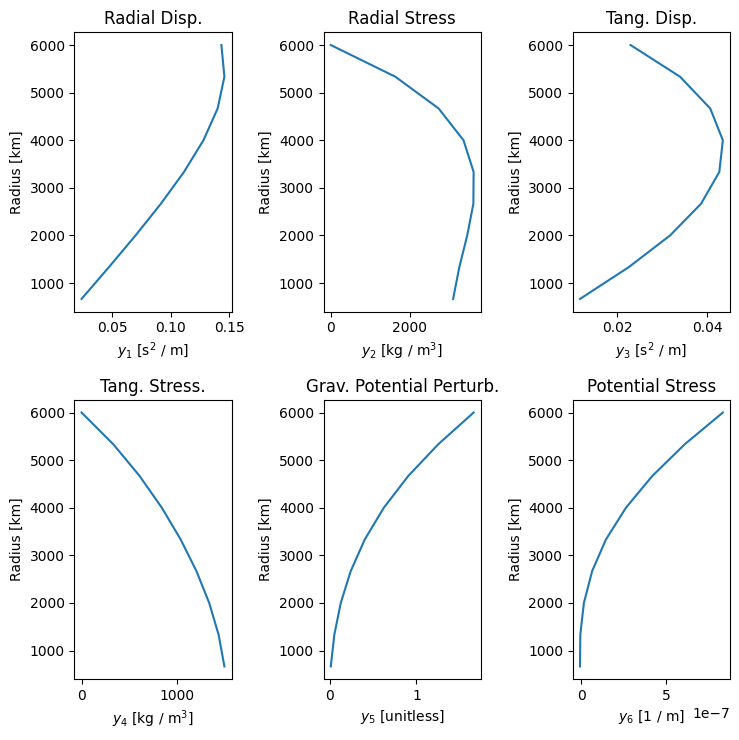

Steps Required:
[[12 15 12]]
[[0.6584766 -0.03056422j 1.29915312-0.06226471j 0.20796842-0.0049124j ]]
EOS Steps: [[16]
 [16]]


In [15]:
def test_1layer():

    rs_input = build_planet_constant_layers(
        planet_radius                 = 6000.0e3,
        forcing_frequency             = np.pi * 2. / (86400. * 7.5),
        density_tuple                 = (5400.,),
        static_bulk_modulus_tuple     = (1.0e11,),
        static_shear_modulus_tuple    = (50.0e9,),
        bulk_viscosity_tuple          = (1.0e18,),
        shear_viscosity_tuple         = (1.0e18,),
        layer_type_tuple              = ('solid',),
        layer_is_static_tuple         = (False,),
        layer_is_incompressible_tuple = (False,),
        shear_rheology_model_tuple    = (Andrade(),),
        bulk_rheology_model_tuple     = (Elastic(),),
        radius_fraction_tuple         = (1.0,),
        volume_fraction_tuple         = None,
        slices_tuple                  = None,
        slice_per_layer               = 10,
        perform_checks                = False)

    solution = radial_solver(*rs_input, **radial_solver_kwargs)
    
    print("Result Success:", solution.success, "Result Message:", solution.message)
    
    if run_times:
        %timeit radial_solver(*rs_input, **radial_solver_kwargs)
    solution.plot_ys()

    print("Steps Required:")
    print(solution.steps_taken)

    print(solution.love)
    print('EOS Steps:', solution.eos_steps_taken)

    return solution

# 0.5.4
#   New: 3.12ms; 3.07ms; 3.15ms
#   Old: 94ms; 96.6ms; 94.3ms
# 0.6.0a0
#   New: 3.37ms; 3.14ms; 3.16ms
#   Old: 94ms; 92.6ms; 92.4ms
# 0.6.0a6
#   New: 3.37ms; 3.14ms; 3.16ms
# 0.6.0a8
#   Apples to Apples: 3.85ms; 3.86ms; 4.0ms
#   Using Better tolerances: 
#     0.631ms; 0.628ms; 0.638ms
#     0.269ms; 0.266ms; 0.278ms

solution = test_1layer()

# 2 Layers

Result Success: True Result Message: RadialSolver.ShootingMethod:: completed without any noted issues.

636 μs ± 21 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


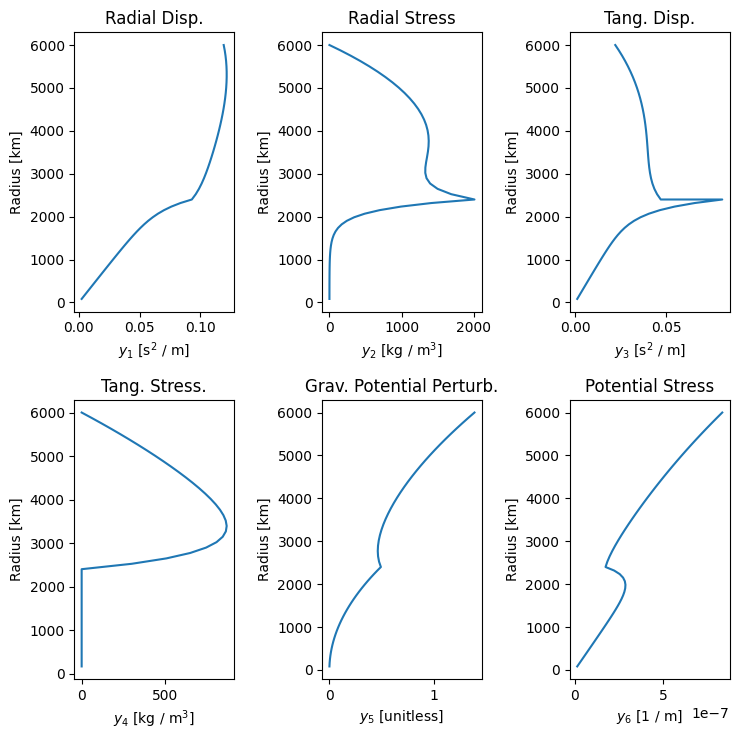

Steps Required:
[[33 56  0]
 [ 6  6  8]]
[[0.38779873-0.00738557j 0.77780085-0.01432472j 0.14384976-0.00323325j]]
EOS Steps: [[12  5]
 [12  5]
 [12  5]]


In [55]:
def test_2layer():

    rs_input = build_planet_constant_layers(
        planet_radius                 = 6000.0e3,
        forcing_frequency             = np.pi * 2. / (86400. * 0.3),
        density_tuple                 = (11000.0, 3400.0),
        static_bulk_modulus_tuple     = (5.0e11, 1.0e11),
        static_shear_modulus_tuple    = (0.0, 50.0e9),
        bulk_viscosity_tuple          = (1000.0, 1.0e18),
        shear_viscosity_tuple         = (1000.0, 1.0e18),
        layer_type_tuple              = ('liquid', 'solid'),
        layer_is_static_tuple         = (False, False),
        layer_is_incompressible_tuple = (False, False),
        shear_rheology_model_tuple    = (Elastic(), Andrade()),
        bulk_rheology_model_tuple     = (Elastic(), Elastic()),
        radius_fraction_tuple         = (0.4, 1.0 - 0.4),
        volume_fraction_tuple         = None,
        slices_tuple                  = None,
        slice_per_layer               = 30,
        perform_checks                = False)

    rs_kwargs = {**radial_solver_kwargs}
    # rs_kwargs['integration_rtol'] = 1.0e-10
    # rs_kwargs['integration_atol'] = 1.0e-15
    # rs_kwargs['starting_radius'] = 2.0e6
    
    solution = radial_solver(*rs_input, **rs_kwargs)
    
    print("Result Success:", solution.success, "Result Message:", solution.message)
    
    if run_times:
        %timeit radial_solver(*rs_input, **radial_solver_kwargs)
    solution.plot_ys()

    print("Steps Required:")
    print(solution.steps_taken)

    print(solution.love)
    print('EOS Steps:', solution.eos_steps_taken)

    return solution

# 0.5.3
#   3.06ms; 3.08ms
# 0.5.4
#   New: 2.39ms; 2.42ms; 2.43ms
#   Old: 99.4ms; 97.7ms; 100ms
# 0.6.0
#   New: 2.38ms; 2.41ms; 2.38ms
#   Old: 100ms; 97.8ms; 95.8ms
# 0.6.0a8
#   Apples to Apples: 3.41ms; 3.29ms; 3.28ms
#   Using Better tolerances: 
#     0.680ms; 0.690ms; 0.679ms
#     0.629ms; 0.636ms

test_2layer()

## 3 Layers

Result Success: True Result Message: RadialSolver.ShootingMethod:: completed without any noted issues.

The slowest run took 4.84 times longer than the fastest. This could mean that an intermediate result is being cached.
19.7 ms ± 14.7 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


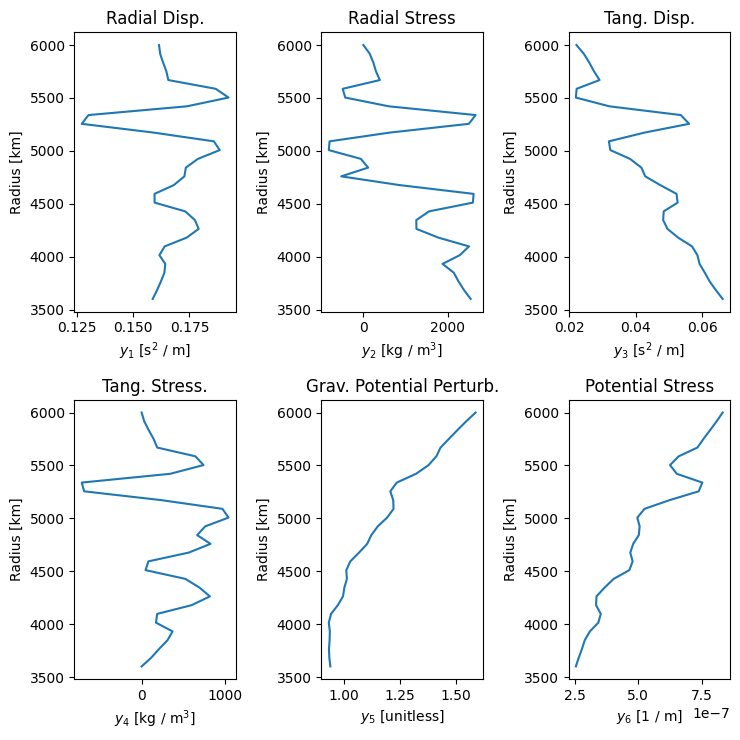

Steps Required:
[[ 0  0  0]
 [23 23  0]
 [16 12  6]]
[[0.5880673 -0.0093863j  1.1915751 -0.01783601j 0.16300863-0.00366817j]]
EOS Steps: [[12  5  4]
 [12  5  4]
 [12  5  4]]


In [2]:
def test_3layer():

    rs_input = build_planet_constant_layers(
        planet_radius                 = 6000.0e3,
        forcing_frequency             = np.pi * 2. / (86400. * 1.1),
        density_tuple                 = (9600.0, 8000.0, 3400.0),
        static_bulk_modulus_tuple     = (10.0e11, 5.0e11, 1.0e11),
        static_shear_modulus_tuple    = (150.0e9, 0.0, 50.0e9),
        bulk_viscosity_tuple          = (1.0e27, 1000.0, 1.0e18),
        shear_viscosity_tuple         = (1.0e27, 1000.0, 1.0e18),
        layer_type_tuple              = ('solid', 'liquid', 'solid'),
        layer_is_static_tuple         = (False, False, False),
        layer_is_incompressible_tuple = (False, False, False),
        shear_rheology_model_tuple    = (Andrade(), Elastic(), Andrade()),
        bulk_rheology_model_tuple     = (Elastic(), Elastic(), Elastic()),
        radius_fraction_tuple         = (0.15, 0.45, 1.0 - 0.45 - 0.15),
        volume_fraction_tuple         = None,
        slices_tuple                  = None,
        slice_per_layer               = 30,
        perform_checks                = False)

    rs_kwargs = {**radial_solver_kwargs}
    # rs_kwargs['integration_rtol'] = 1.0e-10
    # rs_kwargs['integration_atol'] = 1.0e-15
    rs_kwargs['starting_radius'] = 2.0e6
    
    solution = radial_solver(*rs_input, **rs_kwargs)
    
    print("Result Success:", solution.success, "Result Message:", solution.message)
    
    if run_times:
        %timeit radial_solver(*rs_input, **radial_solver_kwargs)
    solution.plot_ys()

    print("Steps Required:")
    print(solution.steps_taken)

    print(solution.love)
    print('EOS Steps:', solution.eos_steps_taken)

    return solution

# 0.5.4
# New: 1.54ms; 1.53ms; 1.55ms
# Old: 112ms; 114ms; 116ms
# 0.6.0a8
#   Apples to Apples: 1.24ms; 1.23ms; 1.23ms
#   Using Better tolerances: 
#     0.625ms; 0.665ms; 0.654ms
#     0.512ms; 0.536ms; 0.535ms

test_3layer()

## 4 Layers (Low Density Liquid)

1.21 ms ± 37.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Result Success: True
Result Message: RadialSolver.ShootingMethod:: completed without any noted issues.



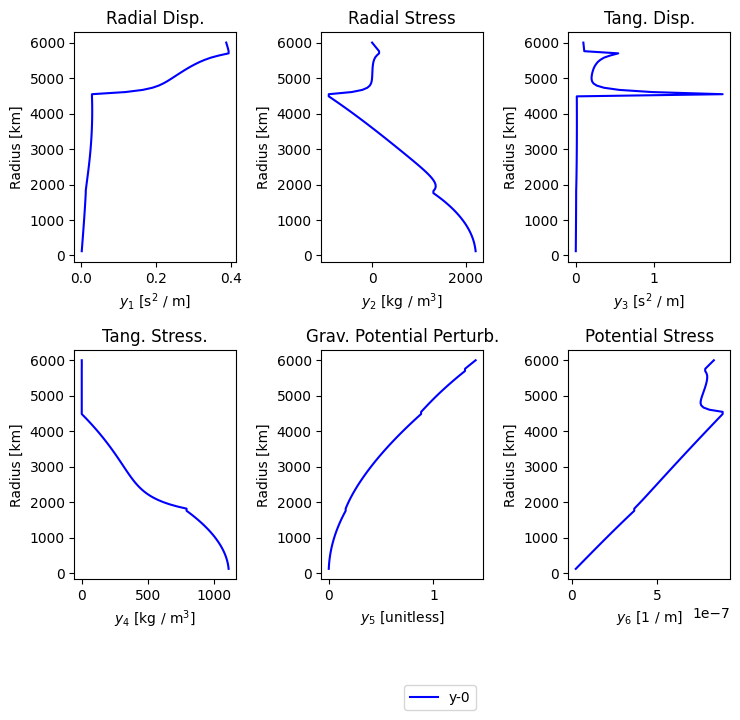

Steps Required:
[[26 29 23]
 [10 13 14]
 [16 18  0]
 [13 13  7]]
[0.40257566-0.00220938j 1.43079096-0.00622687j 0.36210686+0.00223547j]
EOS Steps: [[21  5  4  4]
 [21  5  4  4]
 [21  5  4  4]]


In [56]:
def test_4layer():
    layer_types = ('solid', 'solid', 'liquid', 'solid')
    is_static_by_layer = (False, False, False, False)
    integration_method = 'DOP853'
    integration_rtol = 1.0e-8
    integration_atol = 1.0e-12
    nondimensionalize = True
    is_incompressible_by_layer = (False, False, False, False)
    use_kamata = False
    
    radius_array = np.linspace(0.0, 6000.0e3, 100)
    CMB_radius = 0.3 * radius_array[-1]
    ocean_radius = 0.75 * radius_array[-1]
    ice_radius = 0.95 * radius_array[-1]
    upper_radius_by_layer = np.asarray((CMB_radius, ocean_radius, ice_radius, radius_array[-1]))
    
    frequency = np.pi * 2. / (86400. * 0.5)
    
    ic_index = radius_array <= CMB_radius
    mantle_index = np.logical_and(radius_array > CMB_radius, radius_array <= ocean_radius)
    ocean_index = np.logical_and(radius_array > ocean_radius, radius_array <= ice_radius)
    ice_index = radius_array > ice_radius
    
    indices_by_layer = (ic_index, mantle_index, ocean_index, ice_index)
    density_array = np.ones_like(radius_array) * 3500.
    density_array[ic_index] = 9600.
    density_array[ocean_index] = 1000.
    density_array[ice_index] = 920.
    
    planet_bulk_density = np.average(density_array)
    
    complex_bulk_modulus_array = np.ones(radius_array.size, dtype=np.complex128) * (1.0e11 + 0.0j)
    complex_bulk_modulus_array[ic_index] = (10.0e11 + 0.0j)
    complex_bulk_modulus_array[ocean_index] = (2.2e9 + 0.0j)
    complex_bulk_modulus_array[ice_index] = (5.0e11 + 0.0j)
    
    shear_array = np.ones_like(radius_array) * 50.0e9
    shear_array[ic_index] = 150.0e9
    shear_array[ocean_index] = 0.0
    shear_array[ice_index] = 3.0e9
    
    viscosity_array = np.ones_like(radius_array) * 1.0e18
    viscosity_array[ic_index] = 1.0e27
    viscosity_array[ocean_index] = 1000.
    viscosity_array[ice_index] = 1.0e14

    rheo_inst = Andrade()
    complex_shear_modulus_array = np.empty(radius_array.size, dtype=np.complex128)
    rheo_inst.vectorize_modulus_viscosity(frequency, shear_array, viscosity_array, complex_shear_modulus_array)
    
    volume_array, mass_array, gravity_array = \
        calculate_mass_gravity_arrays(radius_array, density_array)

    input_dict = dict(
        radius_array=radius_array,
        density_array=density_array,
        complex_bulk_modulus_array=complex_bulk_modulus_array,
        complex_shear_modulus_array=complex_shear_modulus_array,
        frequency=frequency,
        planet_bulk_density=planet_bulk_density,
        layer_types=layer_types,
        is_static_bylayer=is_static_by_layer,
        is_incompressible_bylayer=is_incompressible_by_layer,
        upper_radius_bylayer_array=upper_radius_by_layer,
        surface_pressure = 0.0,
        degree_l = 2,
        solve_for = None,
        core_condition = 0,
        use_kamata = use_kamata,
        starting_radius = 1.0e5,
        start_radius_tolerance = 1.0e-5,
        integration_method = integration_method,
        integration_rtol = integration_rtol,
        integration_atol = integration_atol,
        scale_rtols_bylayer_type = False,
        max_num_steps = 100_000,
        expected_size = 150,
        max_ram_MB = 500,
        max_step = 0,
        nondimensionalize = nondimensionalize,
        use_prop_matrix = False,
        verbose = False,
        warnings = False,
        raise_on_fail = False,
        eos_method_bylayer = None,
        eos_integration_method = 'RK45',
        eos_rtol = 1.0e-4,
        eos_atol = 1.0e-12,
        eos_pressure_tol = 1.0e-2,
        eos_max_iters = 50,
        perform_checks = True
    )

    solution = radial_solver(**input_dict)
    
    if run_times:
        %timeit radial_solver(**input_dict)

    ys = solution.result
    print("Result Success:", solution.success)
    print("Result Message:", solution.message)

    yplot([ys], [radius_array], colors=['b'])

    print("Steps Required:")
    print(solution.steps_taken)

    print(solution.love)
    print('EOS Steps:', solution.eos_steps_taken)

# 0.5.4
#   New: 9.05ms; 8.95ms; 8.33ms; 8.48ms
#   Old: 275ms; 266ms; 263ms; 265ms
# 0.6.0
#   New: 8.63ms; 8.51ms; 8.53ms; 8.62ms
#   Old: 260ms; 266ms; 259ms
# 0.6.0a8
#   Apples to Apples: 8.41ms; 8.58ms; 8.51ms
#   Using Better tolerances: 
#     1.21ms; 1.22ms; 1.21ms

test_4layer()